# Uncertainty on market shares

In [91]:
import brightway2 as bw
import bw2calc as bc
import bw2data as bd
import numpy as np
import pandas as pd
import presamples as ps
import scipy
import scipy.stats as stats
ps.__version__
import seaborn as sns

In [92]:
sns.set_style("darkgrid")

# Ecoinvent examples of confidence, trajectories and levels 

In [93]:
import pandas as pd
import re

# Your cleaning function
def clean_activity_string(raw_string):
    cleaned = raw_string.replace("'", "")
    
    generic_phrase = "to generic market for transport, freight, lorry, unspecified"
    cleaned = re.sub(re.escape(generic_phrase), "", cleaned, flags=re.IGNORECASE).strip()
    
    generic_phrase = "measured as solid wood under bark"
    cleaned = re.sub(re.escape(generic_phrase), "", cleaned, flags=re.IGNORECASE).strip()

    # Step 2: Replace long-form units with abbreviations
    unit_replacements = {
        "kilogram": "kg",
        "kilograms": "kg",
        "ton kilometer": "tkm",
        "tonne kilometer": "tkm",
        "megajoule": "MJ",
        "kilowatt hour": "kWh",
        "cubic meter": "m3",
        "square meter": "m2",
        "meter": "m",
        "second": "s",
    }
    for long, short in unit_replacements.items():
        cleaned = re.sub(rf'\b{long}\b', short, cleaned, flags=re.IGNORECASE)

    # Step 3: Remove ", None" from inside parentheses
    cleaned = re.sub(r',?\s*None\s*\)', ')', cleaned)

    return cleaned


In [94]:
sawnwood_150 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_150_levels.csv")
sawnwood_100 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_100_levels.csv")
sawnwood_50 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_50_levels.csv")
sawnwood_200 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_200_levels.csv")
sawnwood_250 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_250_levels.csv")
sawnwood_400 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_400_levels.csv")

In [95]:
result = pd.concat([sawnwood_150, sawnwood_100, sawnwood_50, sawnwood_250, sawnwood_200, sawnwood_400], ignore_index=True)

C:\Users\rla44\AppData\Local\Temp\ipykernel_10900\3590906038.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


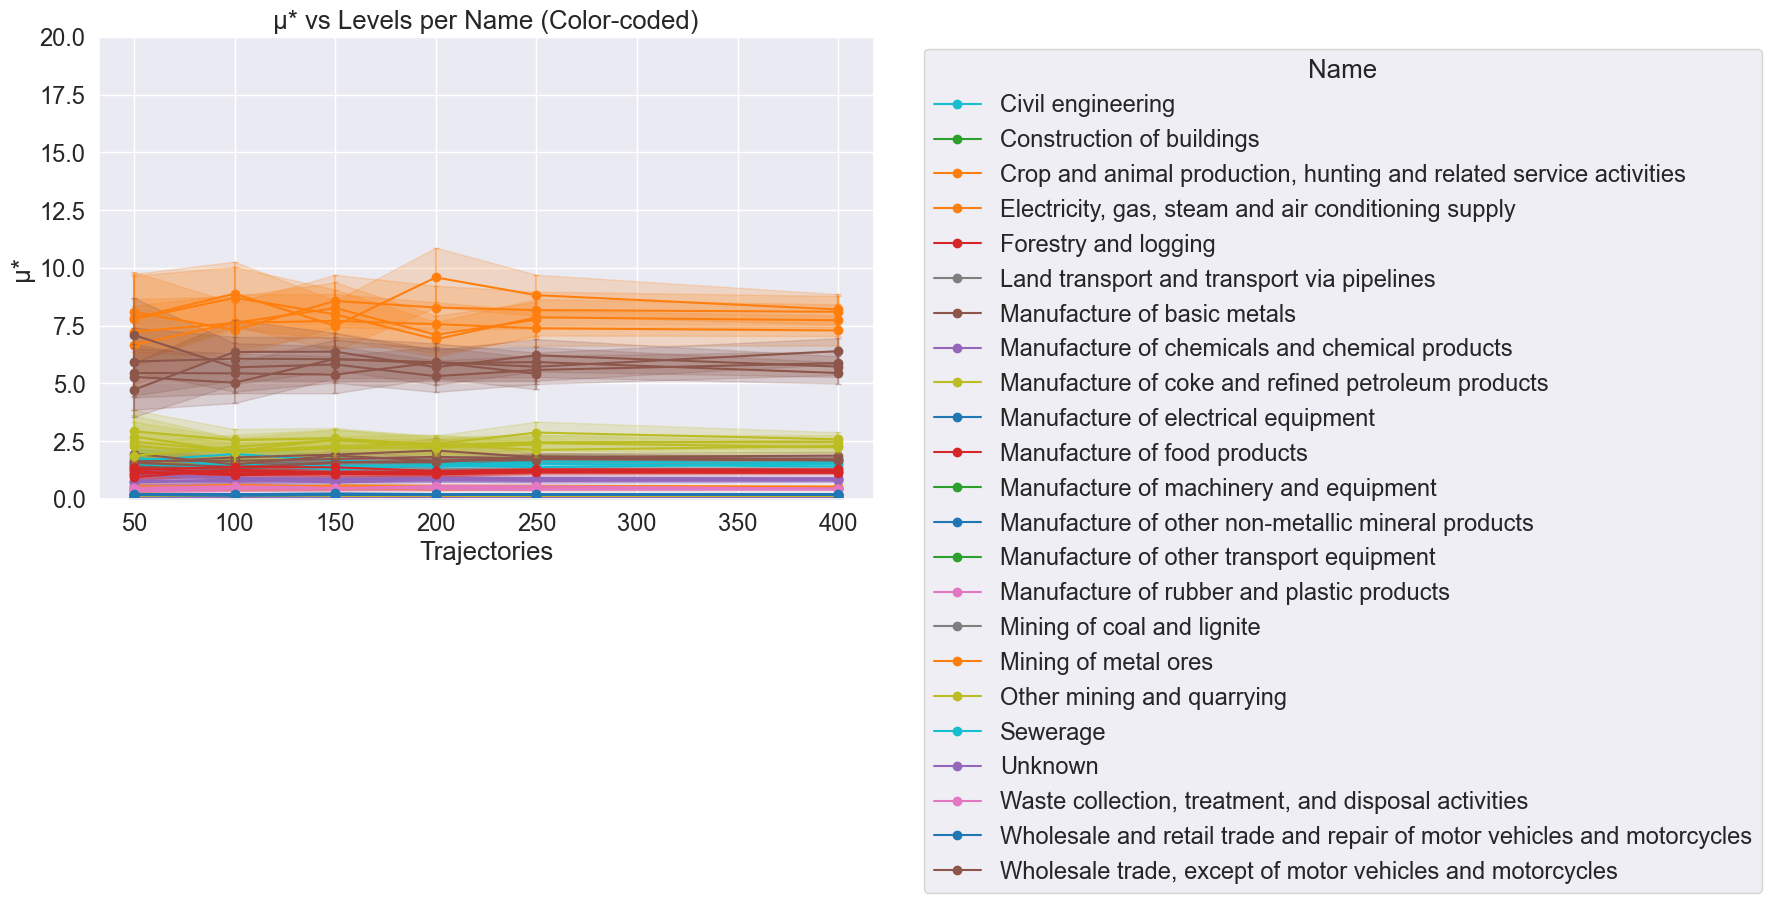

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

palette = sns.color_palette("tab10")
name_to_color = {name: palette[i % len(palette)] for i, name in enumerate(result['names'].unique())}
plotted_names = set()

groups = result.groupby(["names", "levels"])

for (name, level), group in groups:
    group = group.sort_values("trajectories")
    color = name_to_color[name]

    # Avoid duplicate legend entries
    label = name if name not in plotted_names else None

    # Line plot
    plt.plot(group["trajectories"], group["mu_star"], marker="o", label=label, color=color)

    # Error bars
    plt.errorbar(group["trajectories"], group["mu_star"], yerr=group["mu_star_conf"],
                 fmt='none', ecolor=color, alpha=0.4, capsize=2)

    # Confidence band (fill) in same color
    plt.fill_between(group["trajectories"],
                     group["mu_star"] - group["mu_star_conf"],
                     group["mu_star"] + group["mu_star_conf"],
                     color=color, alpha=0.2)

    plotted_names.add(name)

plt.ylim(0, 20)
plt.title("μ* vs Levels per Name (Color-coded)")
plt.xlabel("Trajectories")
plt.ylabel("μ*")
plt.legend(title="Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [97]:
sawnwood_150 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_150_levels.csv")
sawnwood_100 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_100_levels.csv")
sawnwood_50 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_50_levels.csv")
sawnwood_200 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_200_levels.csv")
sawnwood_250 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_250_levels.csv")
sawnwood_400 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_400_levels.csv")

In [98]:
sawnwood_150 = sawnwood_150[sawnwood_150['trajectories'] == 400]
sawnwood_100 = sawnwood_100[sawnwood_100['trajectories'] == 400]
sawnwood_50 = sawnwood_50[sawnwood_50['trajectories'] == 400]
sawnwood_200 = sawnwood_200[sawnwood_200['trajectories'] == 400]
sawnwood_250 = sawnwood_250[sawnwood_250['trajectories'] == 400]
sawnwood_400 = sawnwood_400[sawnwood_400['trajectories'] == 400]

In [99]:
levels_category = pd.concat([sawnwood_150, sawnwood_100, sawnwood_50, sawnwood_250, sawnwood_200, sawnwood_400], ignore_index=True)

In [100]:
sawnwood_16 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_level_16.csv")
sawnwood_12 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_level_12.csv")
sawnwood_8 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_level_8.csv")
sawnwood_4 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_level_4.csv")

In [101]:
sawnwood_16['levels'] = 16
sawnwood_12['levels'] = 12
sawnwood_8['levels'] = 8
sawnwood_4['levels'] = 4


In [102]:
levels_markets =  pd.concat([sawnwood_16, sawnwood_12, sawnwood_8, sawnwood_4], ignore_index=True)

In [103]:
levels_markets['names'] = levels_markets['names'].apply(clean_activity_string)

C:\Users\rla44\AppData\Local\Temp\ipykernel_10900\2530521439.py:70: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


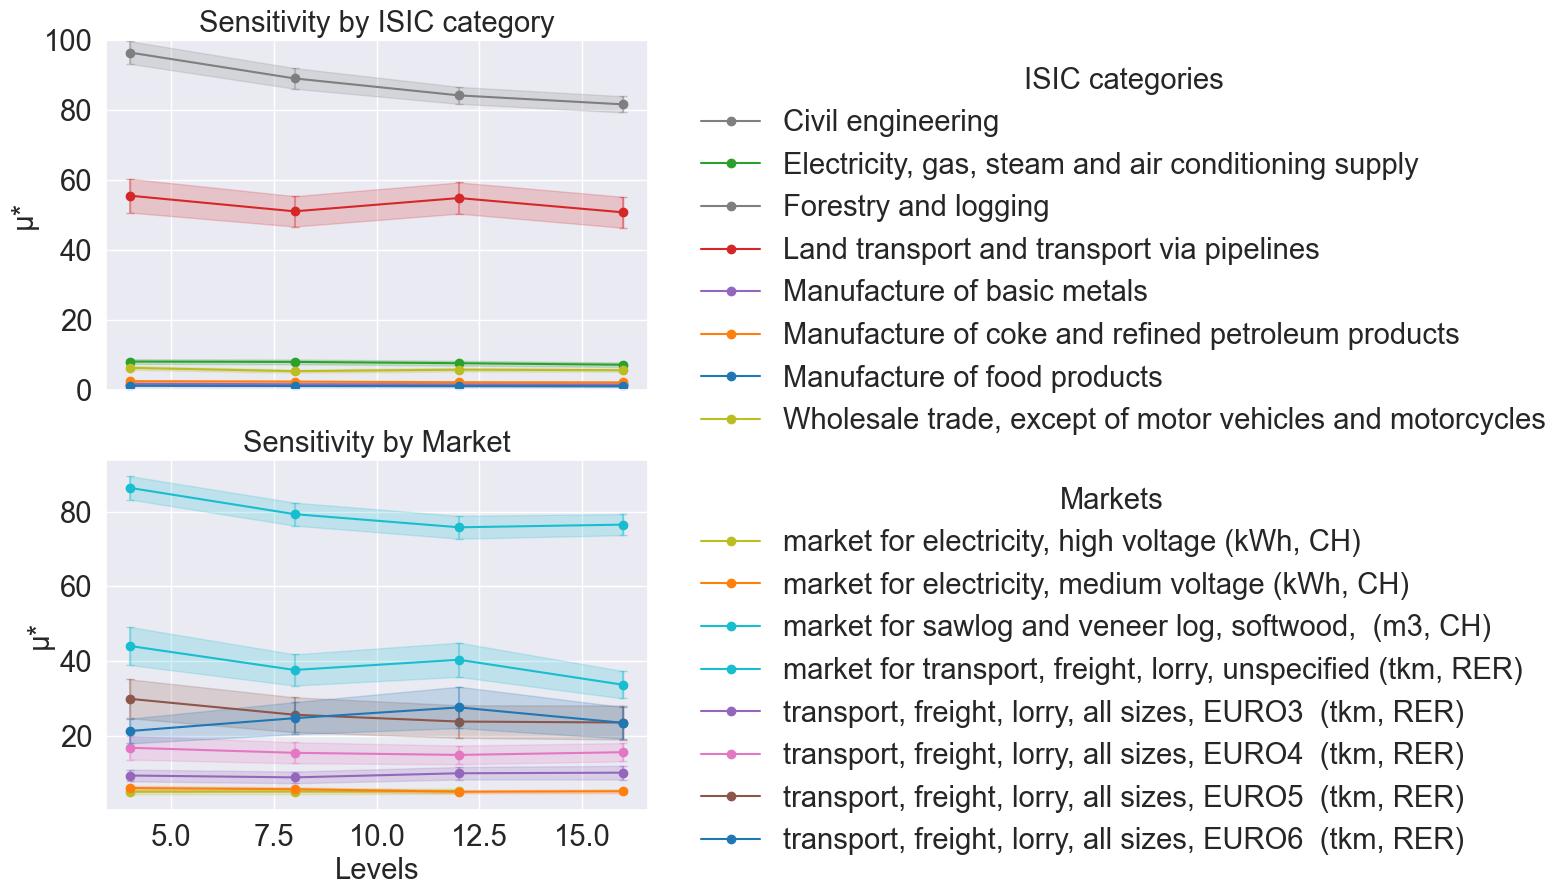

In [171]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10), sharex=True)
sns.set_context("notebook", font_scale=1)

palette = sns.color_palette("tab10")

### --- Top plot: results_levels ---
filtered_results = levels_category[levels_category["mu_star"] > 1].dropna(subset=["mu_star", "mu_star_conf"])
name_to_color_category = {name: palette[i % len(palette)] for i, name in enumerate(levels_category['names'].unique())}
plotted_names_category = set()
groups_category = filtered_results.groupby("names")

for name, group in groups_category:
    group = group.sort_values("levels")
    color = name_to_color_category[name]
    label = name if name not in plotted_names_category else None

    x = group["levels"]
    y = group["mu_star"]
    yerr = group["mu_star_conf"]

    ax1.plot(x, y, marker='o', label=label, color=color)
    ax1.errorbar(x, y, yerr=yerr, fmt='none', ecolor=color, alpha=0.4, capsize=3)
    ax1.fill_between(x, y - yerr, y + yerr, color=color, alpha=0.2)

    plotted_names_category.add(name)

ax1.set_ylabel("μ*", fontsize=21)
ax1.set_ylim(0, 100)
ax1.legend(title="ISIC categories",title_fontsize=21, bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False, fontsize=21)
ax1.set_title("Sensitivity by ISIC category", fontsize=21)
ax1.tick_params(axis='x', labelsize=21)
ax1.tick_params(axis='y', labelsize=21)

### --- Bottom plot: results_markets ---
filtered_results = levels_markets[levels_markets["mu_star"] > 6].dropna(subset=["mu_star_relative", "mu_star_conf_relative"])
name_to_color_markets = {name: palette[i % len(palette)] for i, name in enumerate(levels_markets['names'].unique())}
plotted_names_markets = set()
groups_markets = filtered_results.groupby("names")

for name, group in groups_markets:
    group = group.sort_values("levels")
    color = name_to_color_markets[name]
    label = name if name not in plotted_names_markets else None

    x = group["levels"].values
    y = group["mu_star_relative"].values
    yerr = group["mu_star_conf_relative"].values

    ax2.plot(x, y, marker='o', label=label, color=color)
    ax2.errorbar(x, y, yerr=yerr, fmt='none', ecolor=color, alpha=0.4, capsize=3)
    ax2.fill_between(x, y - yerr, y + yerr, color=color, alpha=0.2)

    plotted_names_markets.add(name)

ax2.set_xlabel("Levels",fontsize = 21)
ax2.set_ylabel("μ*", fontsize=21)
ax2.legend(title="Markets", title_fontsize=21, bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False, fontsize=21)
ax2.set_title("Sensitivity by Market", fontsize=21)
ax2.tick_params(axis='x', labelsize=21)
ax2.tick_params(axis='y', labelsize=21)




plt.tight_layout()
plt.show()
fig.savefig("figures/levels_confidence.pdf", bbox_inches="tight")


In [105]:
Global_market_10 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores.csv")
Global_market_20 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_20.csv")
Global_market_100 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_100.csv")
Global_market_150 = pd.read_csv("results/Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_150.csv")
Global_market_200 = pd.read_csv("results/Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_200.csv")
Global_market_250 = pd.read_csv("results/Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_250.csv")
Global_market_300 = pd.read_csv("results/Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_300.csv")
Global_market_50= pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_level_12_50_trajectory.csv")

In [106]:
results_markets = pd.concat([Global_market_10, 
                             Global_market_50, 
                       Global_market_100,
                      Global_market_150,
                      Global_market_200,
                        Global_market_250,
                      Global_market_300], axis=0)

In [107]:
results_markets['names'] = results_markets['names'].apply(clean_activity_string)

In [108]:
sawnwood_150 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_150.csv")
sawnwood_200 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_200.csv")
sawnwood_250 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_250.csv")
sawnwood_100 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_100.csv")
sawnwood_10 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_10.csv")
sawnwood_300 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_300.csv")
sawnwood_50 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_12_levels_50_trajectory.csv")

In [109]:
results_category = pd.concat([sawnwood_10, sawnwood_50, sawnwood_150, sawnwood_100, sawnwood_50, sawnwood_250, sawnwood_200, sawnwood_300], ignore_index=True)

C:\Users\rla44\AppData\Local\Temp\ipykernel_10900\1366957213.py:84: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


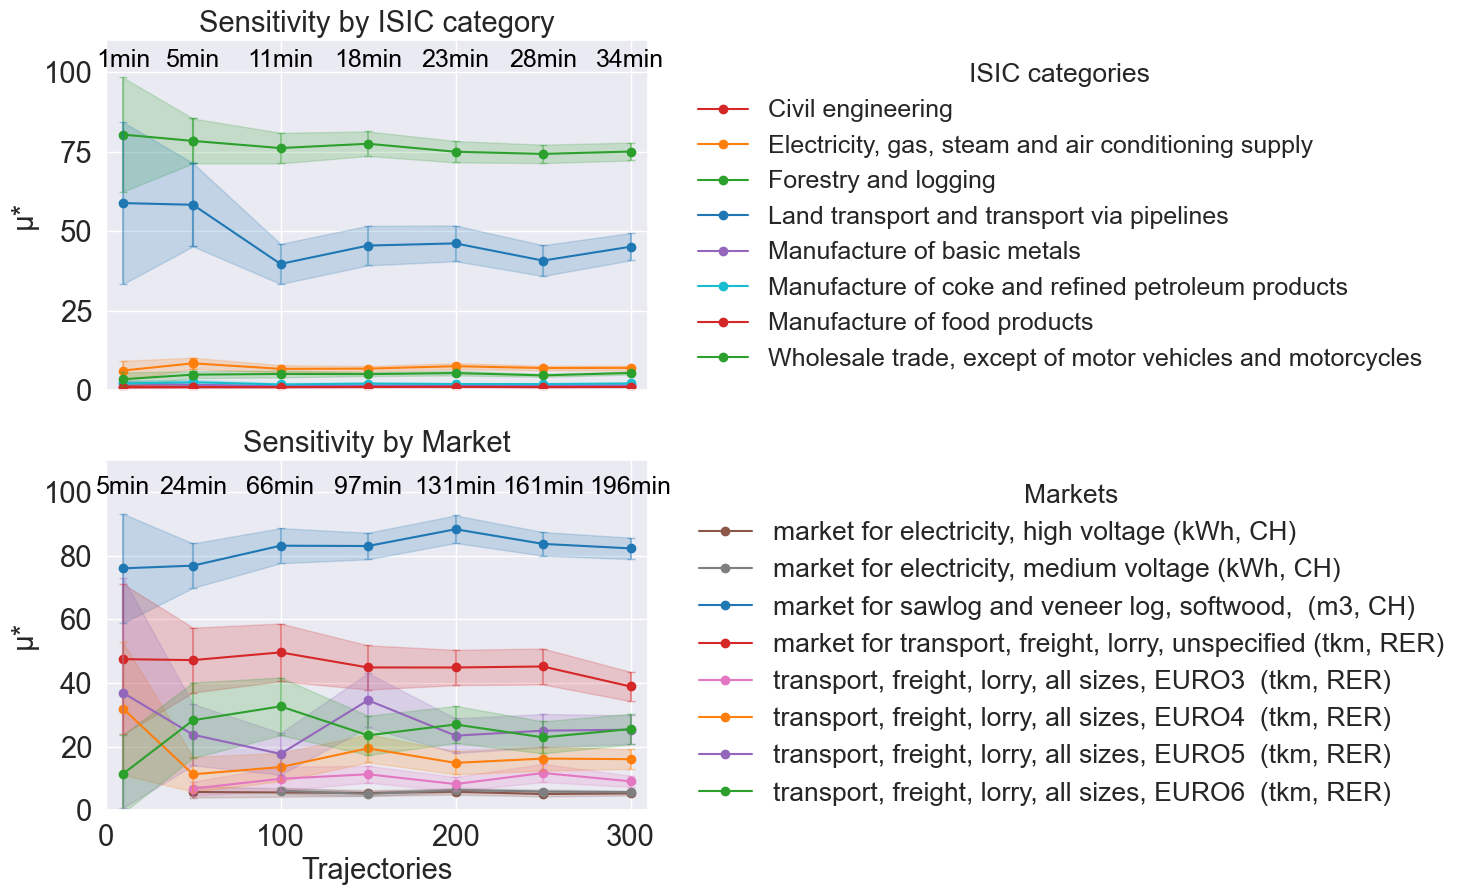

In [159]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10), sharex=True)
sns.set_context("notebook", font_scale=1)
palette = sns.color_palette("tab10")

### --- Top plot: results_levels ---
filtered_results = results_category[results_category["mu_star"] > 1].dropna(subset=["mu_star_relative", "mu_star_conf_relative"])
name_to_color_category = {name: palette[i % len(palette)] for i, name in enumerate(results_category['names'].unique())}
plotted_names_category = set()
groups_category = filtered_results.groupby("names")

for name, group in groups_category:
    group = group.sort_values("trajectories")
    color = name_to_color_category[name]
    label = name if name not in plotted_names_category else None

    x = group["trajectories"]
    y = group["mu_star_relative"]
    yerr = group["mu_star_conf_relative"]

    ax1.plot(x, y, marker='o', label=label, color=color)
    ax1.errorbar(x, y, yerr=yerr, fmt='none', ecolor=color, alpha=0.4, capsize=3)
    ax1.fill_between(x, y - yerr, y + yerr, color=color, alpha=0.2)

    plotted_names_category.add(name)

ax1.set_ylabel("μ*", fontsize=21)
ax1.set_ylim(0, 110)
ax1.legend(title="ISIC categories", bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False, fontsize=18, title_fontsize=19)
ax1.set_title("Sensitivity by ISIC category", fontsize=21)
ax1.tick_params(axis='x', labelsize=21)
ax1.tick_params(axis='y', labelsize=21)

### --- Bottom plot: results_markets ---
filtered_results = results_markets[results_markets["mu_star"] > 6].dropna(subset=["mu_star_relative", "mu_star_conf_relative"])
name_to_color_markets = {name: palette[i % len(palette)] for i, name in enumerate(filtered_results['names'].unique())}
plotted_names_markets = set()
groups_markets = filtered_results.groupby("names")

for name, group in groups_markets:
    group = group.sort_values("trajectories")
    color = name_to_color_markets[name]
    label = name if name not in plotted_names_markets else None

    x = group["trajectories"].values
    y = group["mu_star_relative"].values
    yerr = group["mu_star_conf_relative"].values

    ax2.plot(x, y, marker='o', label=label, color=color)
    ax2.errorbar(x, y, yerr=yerr, fmt='none', ecolor=color, alpha=0.4, capsize=3)
    ax2.fill_between(x, y - yerr, y + yerr, color=color, alpha=0.2)

    plotted_names_markets.add(name)
    
unique_trajectories = results_category["trajectories"].unique()
runtime_by_trajectory = results_category.drop_duplicates("trajectories")[["trajectories", "runtime"]]
for _, row in runtime_by_trajectory.iterrows():
    traj = row["trajectories"]
    rt = row["runtime"]/60
    ax1.text(traj, 100, f"{int(rt)}min", ha='center', va='bottom', fontsize=18, rotation=0, color='black')
    
unique_trajectories = results_markets["trajectories"].unique()
runtime_by_trajectory = results_markets.drop_duplicates("trajectories")[["trajectories", "runtime"]]
for _, row in runtime_by_trajectory.iterrows():
    traj = row["trajectories"]
    rt = row["runtime"]/60
    ax2.text(traj, 105, f"{int(rt)}min", ha='center', va='top', fontsize=18, rotation=0, color='black')

ax2.set_xlabel("Trajectories", fontsize=21)
ax2.set_ylabel("μ*", fontsize=21)
ax2.set_ylim(0, 110)
ax2.set_xlim(0, 310)
ax2.legend(title="Markets",  bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False, fontsize=19, title_fontsize=19)
ax2.set_title("Sensitivity by Market", fontsize=21)
ax2.tick_params(axis='x', labelsize=21)
ax2.tick_params(axis='y', labelsize=21)



plt.tight_layout()
plt.show()
fig.savefig("figures/confidence.pdf", bbox_inches="tight")





# Ecoinvent: Confidence interval, trajectories and levels

In [111]:
Global_market_10 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores.csv")
Global_market_20 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_20.csv")
Global_market_100 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_100.csv")
Global_market_150 = pd.read_csv("results/Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_150.csv")
Global_market_200 = pd.read_csv("results/Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_200.csv")
Global_market_250 = pd.read_csv("results/Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_250.csv")
Global_market_300 = pd.read_csv("results/Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_300.csv")

In [112]:
global_markets = [Global_market_10, Global_market_100, Global_market_150, 
                  Global_market_200, Global_market_250, Global_market_300]

nb_factors = len(Global_market_250)

for market in global_markets:
    market['number of variables'] = nb_factors

In [113]:
Global_category_10 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_10.csv")
Global_category_20 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores.csv")
Global_category_30 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_30.csv")
Global_category_40 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_40.csv")
Global_category_100 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_100.csv")
Global_category_300 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_300.csv")
Global_category_150 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_150.csv")
Global_category_250 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_250.csv")


In [114]:
Global_market_20 = Global_market_20[Global_market_20["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_10 = Global_market_10[Global_market_10["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_100 = Global_market_100[Global_market_100["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_150 = Global_market_150[Global_market_150["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_200 = Global_market_200[Global_market_200["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_250 = Global_market_250[Global_market_250["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_300 = Global_market_300[Global_market_300["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]


In [115]:
joined_df = pd.concat([Global_market_10, 
                       Global_market_100,
                      Global_market_150,
                      Global_market_200,
                        Global_market_250,
                      Global_market_300], axis=0)
joined_df2 = pd.concat([Global_category_10, 
                       Global_category_100,
                       Global_category_300,
                       Global_category_150,
                       Global_category_250], axis=0)

In [116]:
len(Global_category_100)

23

In [117]:
joined_df2 = joined_df2[joined_df2["names"] == 'Forestry and logging']
joined_df2['number of variables'] = len(Global_category_10)
joined_df2['type'] = 'ISSC_category' 
joined_df['type'] = 'market' 

In [118]:
market_issc = pd.concat([joined_df2 , joined_df], ignore_index=True)

C:\Users\rla44\AppData\Local\Temp\ipykernel_10900\3850399789.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_morris = ax2.scatter(data=joined_df, x="number of runs", y="runtime",
C:\Users\rla44\AppData\Local\Temp\ipykernel_10900\3850399789.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_morris = ax4.scatter(data=joined_df2, x="number of runs", y="runtime",
C:\Users\rla44\AppData\Local\Temp\ipykernel_10900\3850399789.py:97: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=10)


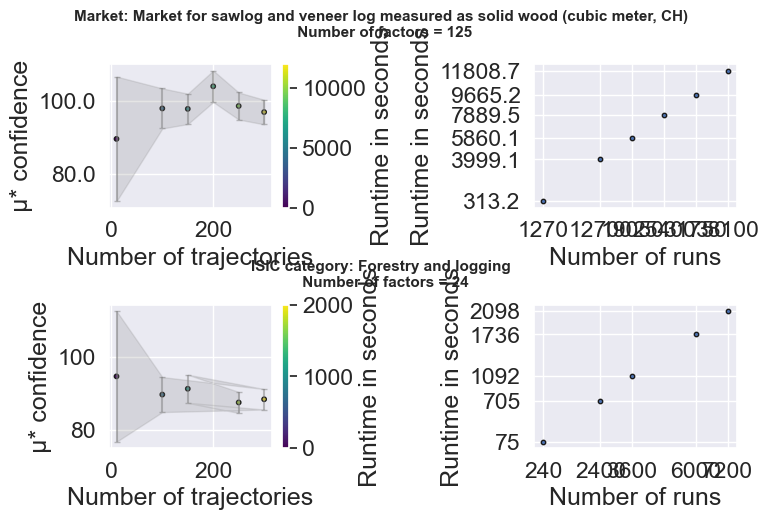

In [119]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, axes = plt.subplots(2, 2, figsize=(8, 5))  # 2 rows, 2 columns
(ax1, ax2), (ax3, ax4) = axes  # Unpack axes

# --- First Scatter Plot ---
scatter_morris = ax1.scatter(data=joined_df, x="trajectories", y="mu_star", 
                             c="runtime", cmap='viridis', s=10, edgecolors='k')
ax1.set_xlabel('Number of trajectories')
ax1.set_ylabel('μ* confidence')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
#ax1.set_ylim(5, 40)
lower = joined_df['mu_star'] - joined_df['mu_star_conf_relative']
upper = joined_df['mu_star'] + joined_df['mu_star_conf_relative']

# Plot the shaded confidence band
ax1.fill_between(joined_df['trajectories'], lower, upper, color='gray', alpha=0.2, label='Confidence band')



cbar_morris = plt.colorbar(scatter_morris, ax=ax1)
cbar_morris.mappable.set_clim(0, 12000)
cbar_morris.set_label('Runtime in seconds')

ax1.errorbar(
    joined_df['trajectories'], 
    joined_df['mu_star'], 
    yerr=joined_df['mu_star_conf_relative'] ,  
    fmt='none', ecolor='gray', alpha=0.5, capsize=2
)


# --- Second Scatter Plot ---
nb_runs = joined_df["number of runs"]
runtime = joined_df["runtime"]
scatter_morris = ax2.scatter(data=joined_df, x="number of runs", y="runtime", 
                             cmap='viridis', s=10, edgecolors='k')
ax2.set_xlabel('Number of runs')
ax2.set_ylabel('Runtime in seconds')
ax2.set_xticks(nb_runs)
ax2.set_yticks(runtime)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
ax2.set_ylabel('Runtime in seconds')


#ax2.set_title("Market for sawlog and veneer log\nMeasured as solid wood (cubic meter, CH)", fontsize=11)

# --- Third Scatter Plot ---
scatter_morris = ax3.scatter(data=joined_df2, x="trajectories", y="mu_star", 
                             c="runtime", cmap='viridis', s=10, edgecolors='k')
ax3.set_xlabel('Number of trajectories')
ax3.set_ylabel('μ* confidence')
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
#ax3.set_ylim(5, 40)
#ax3.set_title("ISIC category: Forestry and logging", fontsize=11)

ax3.errorbar(
    joined_df2['trajectories'], 
    joined_df2['mu_star'], 
    yerr=joined_df2['mu_star_conf_relative'] ,  
    fmt='none', ecolor='gray', alpha=0.5, capsize=2
)

lower = joined_df2['mu_star'] - joined_df2['mu_star_conf_relative']
upper = joined_df2['mu_star'] + joined_df2['mu_star_conf_relative']

# Plot the shaded confidence band
ax3.fill_between(joined_df2['trajectories'], lower, upper, color='gray', alpha=0.2, label='Confidence band')

cbar_morris = plt.colorbar(scatter_morris, ax=ax3)
cbar_morris.mappable.set_clim(0, 2000)
cbar_morris.set_label('Runtime in seconds')

# --- Fourth Subplot (Optional) ---
nb_runs = joined_df2["number of runs"]
runtime = joined_df2["runtime"]
scatter_morris = ax4.scatter(data=joined_df2, x="number of runs", y="runtime", 
                             cmap='viridis', s=10, edgecolors='k')
ax4.set_xlabel('Number of runs')
ax4.set_ylabel('Runtime')
ax4.set_xticks(nb_runs)
ax4.set_yticks(runtime)
ax4.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
ax4.set_ylabel('Runtime in seconds')
#ax2.set_title("Market for sawlog and veneer log\nMeasured as solid wood (cubic meter, CH)", fontsize=11)



# Add Titles for Columns
#axes[0, 0].set_title("Market for sawlog and veneer log\nMeasured as solid wood (cubic meter, CH)", fontsize=12,  loc="center")
#axes[0, 1].set_title("Column 2: Analysis B", fontsize=12, fontweight="bold", loc="center")

# Add Titles for Rows
fig.text(0.5, 1, "Market: Market for sawlog and veneer log measured as solid wood (cubic meter, CH) \n Number of factors = 125", ha='center', fontsize=11 , fontweight='bold')
fig.text(0.5, 0.5, "ISIC category: Forestry and logging \n Number of factors = 24", ha='center', fontsize=11, fontweight='bold')
fig.tight_layout(pad=10) 

plt.tight_layout()
#fig.savefig("figures/real_case_computational_efficiency.pdf", bbox_inches="tight")

plt.show()



# Cut-off

In [120]:
Global_category_10_cutoff5e_5 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_cutoff5e_5_market_scores_20.csv")
Global_category_10_cutoff5e_5['cutoff'] =  "0.005 %"

Global_category_10_cutoff5e_4 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_cutoff5e_4_market_scores_20.csv")
Global_category_10_cutoff5e_4['cutoff'] =  "0.05 %"

Global_category_10_cutoff5e_6 = pd.read_csv("results/Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_cutoff5e-6_market_scores_20.csv")
Global_category_10_cutoff5e_6['cutoff'] =  "0.0005 %"

df = pd.concat([
    Global_category_10_cutoff5e_6,
    Global_category_10_cutoff5e_5, 
                      Global_category_10_cutoff5e_4], axis=0)

filtered_df = df[df["mu_star_relative"] > 2]
heatmap_data = filtered_df.pivot(index="names", columns="cutoff", values="mu_star_relative")
heatmap_data 

cutoff,0.0005 %,0.005 %,0.05 %
names,,,
"'market for electricity, for reuse in municipal waste incineration only' (kilowatt hour, CH, None)",3.061871,4.384797,NaN
"'market for electricity, high voltage' (kilowatt hour, CH, None)",5.167291,3.352260,4.292380
"'market for electricity, medium voltage' (kilowatt hour, CH, None)",4.357078,5.880731,4.099221
"'market for petroleum' (kilogram, CH, None)",2.646288,2.259840,NaN
"'market for petroleum' (kilogram, Europe without Switzerland, None)",3.135194,4.145467,4.245404
"'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)",79.308884,83.712803,79.594139
"'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, Europe without Switzerland, None)",NaN,2.158844,2.163565
"'market for transport, freight, lorry, unspecified' (ton kilometer, RER, None)",32.790600,32.299809,43.954036
"'transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified' (ton kilometer, RER, None)",10.547145,7.989999,5.390025


In [121]:
runtime = df[df["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]

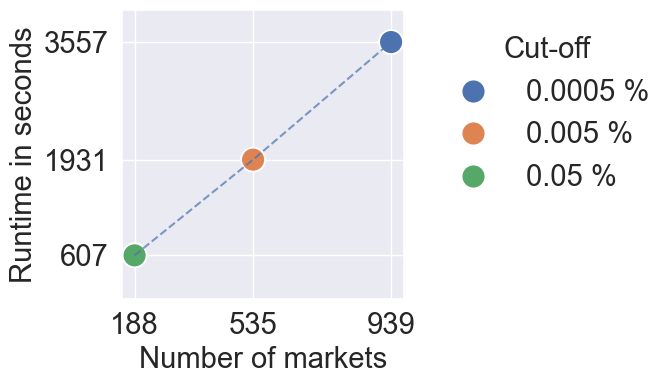

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the theme for seaborn
sns.set_theme(style="darkgrid")

# Create the plot
fig, ax = plt.subplots(figsize=(7, 4))

# Plot scatterplot and lineplot
sns.scatterplot(data=runtime, x="number of variables", y="runtime", hue="cutoff", s=300, ax=ax)
sns.lineplot(data=runtime, x="number of variables", y="runtime", linestyle="--", alpha=0.7, ax=ax)

num= runtime["number of variables"]

run=  runtime["runtime"]
# Labels and title
ax.set_xticks(num)
ax.set_yticks(run)
ax.set_xlabel('Number of markets', fontsize=21)
ax.set_ylim(0, 4000)
ax.set_ylabel('Runtime in seconds', fontsize=21)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))

# Move the legend outside and add a title to the legend
ax.legend(title="Cut-off", title_fontsize=21, bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False, fontsize=21)
ax.tick_params(axis='x', labelsize=21)
ax.tick_params(axis='y', labelsize=21)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure
fig.savefig("figures/cutoffandruntime.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(-0.2, 0, 7, 4))



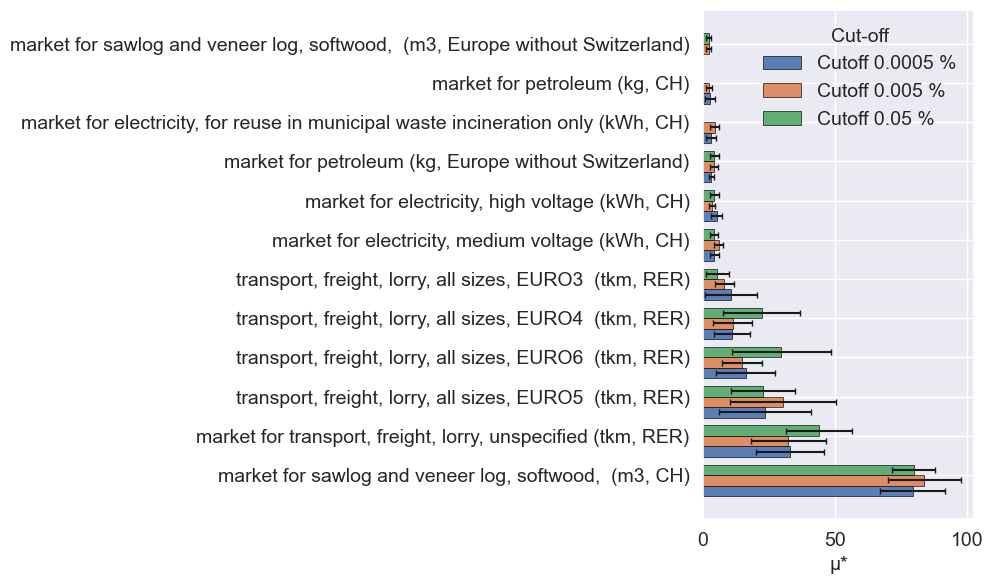

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Clean names
filtered_df['names'] = filtered_df['names'].apply(clean_activity_string)
filtered_df = filtered_df[filtered_df['names'] != 'other']  # Remove "other"
# Sort cutoffs
cutoffs = sorted(filtered_df['cutoff'].unique())

# Pivot
mu_star_pivot = filtered_df.pivot(index='names', columns='cutoff', values='mu_star_relative')
conf_pivot = filtered_df.pivot(index='names', columns='cutoff', values='mu_star_conf_relative')

# Sort activities by descending mean μ*
mu_star_mean = mu_star_pivot.mean(axis=1)
sorted_activities = mu_star_mean.sort_values(ascending=False).index.tolist()
mu_star_pivot = mu_star_pivot.loc[sorted_activities]
conf_pivot = conf_pivot.loc[sorted_activities]

# Plot settings
n_activities = len(sorted_activities)
n_cutoffs = len(cutoffs)
group_height = 0.8
bar_height = group_height / n_cutoffs   # slight overlap
y_pos = np.arange(n_activities)

fig, ax = plt.subplots(figsize=(10, max(6, n_activities * 0.4)))

# Plot bars
for i, cutoff in enumerate(cutoffs):
    offsets = y_pos - group_height / 2 + i * (group_height / n_cutoffs)
    ax.barh(
        y=offsets,
        width=mu_star_pivot[cutoff],
        xerr=conf_pivot[cutoff],
        height=bar_height,
        label=f"Cutoff {cutoff}",
        capsize=2,
        linewidth=0.5,
        edgecolor='black',
        alpha=0.9
    )

# Axes and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_activities, fontsize=14)
ax.set_xlabel("μ*", fontsize=14)
ax.legend(title="Cut-off", fontsize=14, title_fontsize=14, loc='upper right', frameon = False)
ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()
fig.savefig("figures/cutoffbarchart.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(0, 0, 10, 6))
